In [16]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_total = pd.read_csv('https://raw.githubusercontent.com/CatitaR/CapstoneProject_ADD/main/data/processed/base_analisis.csv')
data_rm = pd.read_csv('https://raw.githubusercontent.com/CatitaR/CapstoneProject_ADD/main/data/processed/base_analisis_rm.csv')
data_otras = pd.read_csv('https://raw.githubusercontent.com/CatitaR/CapstoneProject_ADD/main/data/processed/base_analisis_otras.csv')

In [7]:
data_total[['tasa_def','prop_rural','etnia','ingreso','tasa_denuncias']].corr()

,tasa_def,prop_rural,etnia,ingreso,tasa_denuncias
tasa_def,1.000000,0.333822,0.273611,-0.265321,-0.155897
prop_rural,0.333822,1.000000,0.311531,-0.383921,-0.291506
etnia,0.273611,0.311531,1.000000,-0.137925,-0.174545
ingreso,-0.265321,-0.383921,-0.137925,1.000000,0.312979
tasa_denuncias,-0.155897,-0.291506,-0.174545,0.312979,1.000000


In [8]:
data_rm[['tasa_def','prop_rural','etnia','ingreso','tasa_denuncias']].corr()

,tasa_def,prop_rural,etnia,ingreso,tasa_denuncias
tasa_def,1.000000,0.088934,0.386770,-0.523736,-0.077334
prop_rural,0.088934,1.000000,-0.125432,-0.217116,-0.232757
etnia,0.386770,-0.125432,1.000000,-0.427525,-0.172136
ingreso,-0.523736,-0.217116,-0.427525,1.000000,0.213438
tasa_denuncias,-0.077334,-0.232757,-0.172136,0.213438,1.000000


In [9]:
data_otras[['tasa_def','prop_rural','etnia','ingreso','tasa_denuncias']].corr()

,tasa_def,prop_rural,etnia,ingreso,tasa_denuncias
tasa_def,1.000000,0.286528,0.237881,-0.225657,-0.126749
prop_rural,0.286528,1.000000,0.290781,-0.494263,-0.255537
etnia,0.237881,0.290781,1.000000,-0.089675,-0.191956
ingreso,-0.225657,-0.494263,-0.089675,1.000000,0.253904
tasa_denuncias,-0.126749,-0.255537,-0.191956,0.253904,1.000000


In [10]:
mod1 = smf.ols(formula='tasa_def ~ ingreso', data=data_total)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     24.38
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.27e-06
Time:                        21:32:24   Log-Likelihood:                -1508.7
No. Observations:                 324   AIC:                             3021.
Df Residuals:                     322   BIC:                             3029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4490      3.024     21.642      0.0

In [11]:
mod2 = smf.ols(formula='tasa_def ~ ingreso', data=data_rm)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     18.90
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           6.76e-05
Time:                        21:33:08   Log-Likelihood:                -189.94
No. Observations:                  52   AIC:                             383.9
Df Residuals:                      50   BIC:                             387.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.8451      2.259     19.850      0.0

In [22]:
mod3 = smf.ols(formula='tasa_def ~ ingreso', data=data_otras)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     14.49
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           0.000175
Time:                        21:40:45   Log-Likelihood:                -1280.0
No. Observations:                 272   AIC:                             2564.
Df Residuals:                     270   BIC:                             2571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.6860      6.127     12.679      0.0

In [19]:
mod4 = smf.ols(formula='tasa_def ~ ingreso + prop_rural + etnia + tasa_denuncias', data=data_total)
res4 = mod4.fit()
params4 = res4.params
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     15.69
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           9.79e-12
Time:                        21:40:14   Log-Likelihood:                -1491.4
No. Observations:                 324   AIC:                             2993.
Df Residuals:                     319   BIC:                             3012.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         49.4605      4.431     11.

In [20]:
mod5 = smf.ols(formula='tasa_def ~ ingreso + prop_rural + etnia + tasa_denuncias', data=data_rm)
res5 = mod5.fit()
params5 = res5.params
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     5.291
Date:                Wed, 12 Oct 2022   Prob (F-statistic):            0.00133
Time:                        21:40:25   Log-Likelihood:                -188.61
No. Observations:                  52   AIC:                             387.2
Df Residuals:                      47   BIC:                             397.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.2487      5.120      7.

In [21]:
mod6 = smf.ols(formula='tasa_def ~ ingreso + prop_rural + etnia + tasa_denuncias', data=data_otras)
res6 = mod6.fit()
params6 = res6.params
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     9.107
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           6.55e-07
Time:                        21:40:33   Log-Likelihood:                -1269.7
No. Observations:                 272   AIC:                             2549.
Df Residuals:                     267   BIC:                             2567.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         57.3517      8.693      6.

Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos')

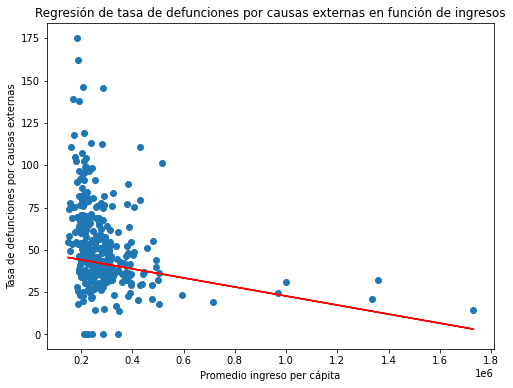

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_total['ingreso'], data_total['tasa_def'], "o", label="Data")
ax.plot(data_total['ingreso'], params4['Intercept']+params4['ingreso']*data_total['ingreso']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos")


Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos')

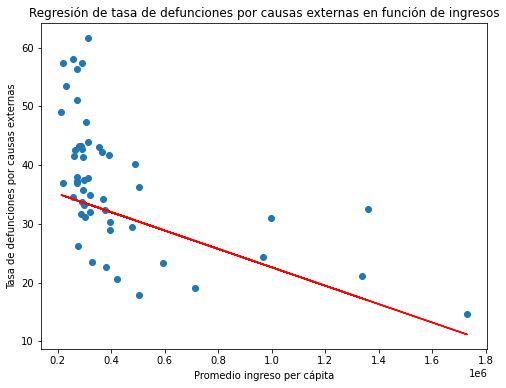

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_rm['ingreso'], data_rm['tasa_def'], "o", label="Data")
ax.plot(data_rm['ingreso'], params5['Intercept']+params5['ingreso']*data_rm['ingreso']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos (RM)")


Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos (resto del país)')

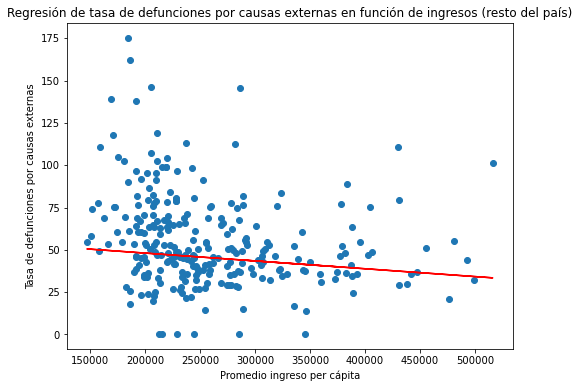

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_otras['ingreso'], data_otras['tasa_def'], "o", label="Data")
ax.plot(data_otras['ingreso'], params6['Intercept']+params6['ingreso']*data_otras['ingreso']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos (resto del país)")


In [30]:
mod7 = smf.ols(formula='tasa_def ~ log(ingreso) + prop_rural + etnia + tasa_denuncias', data=data_rm)
res7 = mod7.fit()
params7 = res7.params
print(res7.summary())

PatsyError: Error evaluating factor: NameError: name 'log' is not defined
    tasa_def ~ log(ingreso) + prop_rural + etnia + tasa_denuncias
               ^^^^^^^^^^^^